##### Import libraries

In [48]:
# operations with data
import pandas as pd
from sklearn.model_selection import train_test_split
# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing
import numpy as np
# scaling
from sklearn.preprocessing import StandardScaler

#### Loading dataset

In [9]:
dataset = pd.read_csv('smoking.csv')
dataset.shape

(55692, 27)

#### Preprocessing

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [16]:
dataset.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Three columns with object data type: <i>gender, oral, tartar</i>.

Six columns with int64 data type: <i>ID, age, height(cm), weight(kg), dental caries, smoking</i>.

In [21]:
#### Binary Label Encoder
dataset['gender'] = np.where(dataset['gender'] == 'F', np.int64(1), np.int64(0))
dataset['oral'] = np.where(dataset['oral'] == 'Y', np.int64(1), np.int64(0))
dataset['tartar'] = np.where(dataset['tartar'] == 'Y', np.int64(1), np.int64(0))

Now all columns has numeric type. Splitting into X and Y (Y is a target):

In [17]:
del dataset['ID']
X = dataset
#### smoking is a target column
Y = dataset['smoking']
del X['smoking']

Data normalization:

In [22]:
scaler = StandardScaler()
X_temp = scaler.fit_transform(X)
X = pd.DataFrame(X_temp, columns=X.columns)
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,1.320858,-0.346517,-1.049465,-0.457476,-0.080484,0.384861,-0.015315,-0.162046,-0.163846,-0.547989,...,0.269644,-1.101061,-0.215402,-0.838461,-0.422775,-0.259666,-0.257550,0.0,-0.520757,0.894427
1,1.320858,-0.346517,-0.505663,-0.457476,-0.112832,-0.436715,-0.838428,-0.162046,-0.163846,-0.182381,...,0.294079,-1.228898,-0.215402,-1.289883,-0.216113,-0.259666,-0.436511,0.0,-0.520757,0.894427
2,-0.757084,0.896099,0.581943,-0.457476,-0.220659,-0.436715,-0.426872,-0.162046,-0.163846,1.206928,...,0.880501,0.752585,-0.215402,0.515806,-0.267779,-0.356604,-0.356973,0.0,-0.520757,-1.118034
3,-0.757084,-0.346517,0.038140,0.322543,0.641955,1.001044,1.013576,-0.162046,-0.163846,-1.571690,...,2.713072,0.049478,-0.215402,0.515806,-0.371110,-0.033477,-0.436511,0.0,-0.520757,0.894427
4,1.320858,-0.346517,-1.049465,-0.457476,0.426302,-0.025927,-0.015315,-0.162046,-0.163846,-0.109259,...,-0.194607,-1.356736,-0.215402,-1.289883,-0.526106,-0.421230,-0.356973,0.0,-0.520757,-1.118034


#### Explotary Analysis

Корреляция признаков между собой

<AxesSubplot:>

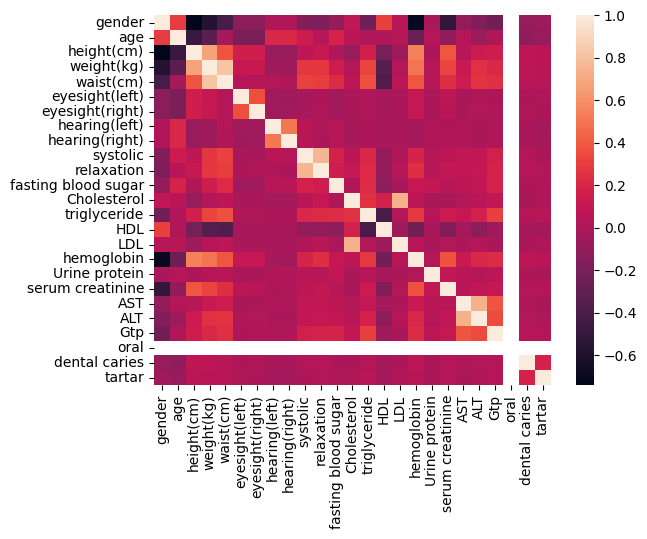

In [26]:
X_correlation = X.corr()
sns.heatmap(X_correlation)

Рассмотрим столбцы с корреляцией > 0.5 (нужно сообразить, как избавиться от повторений):

In [39]:
corr_cloumns = set()
for row_column in X_correlation:
    for col_column in X_correlation:
        cell_corr = X_correlation[row_column][col_column]
        if cell_corr > 0.5 and cell_corr != 1.0:
            comment = row_column + " AND " + col_column + " has correlation = " + str(cell_corr)
            result = (row_column, col_column, cell_corr, comment)
            if (col_column, row_column, cell_corr, _) not in corr_cloumns:
                corr_cloumns.add(result)

Результаты корреляции

In [40]:
for (_, _, _, comment) in corr_cloumns:
    print(comment)

height(cm) AND hemoglobin has correlation = 0.5393672977419964
LDL AND Cholesterol has correlation = 0.7389751399524231
hearing(right) AND hearing(left) has correlation = 0.510095326294578
waist(cm) AND weight(kg) has correlation = 0.8228420491596369
Cholesterol AND LDL has correlation = 0.7389751399524231
hemoglobin AND height(cm) has correlation = 0.5393672977419964
AST AND ALT has correlation = 0.7407264895305563
systolic AND relaxation has correlation = 0.7610510087181237
weight(kg) AND waist(cm) has correlation = 0.8228420491596369
ALT AND AST has correlation = 0.7407264895305563
weight(kg) AND height(cm) has correlation = 0.6756561386523592
height(cm) AND weight(kg) has correlation = 0.6756561386523592
relaxation AND systolic has correlation = 0.7610510087181237
hearing(left) AND hearing(right) has correlation = 0.510095326294578


Высокую корреляцию между собой имеют:

<ul>
<li>height(cm) и hemoglobin</li>
<li>LDL и Cholesterol</li>
<li>hearing(right) и hearing(left)</li>
<li>waist(cm) и weight(kg)</li>
<li>AST и ALT</li>
<li>systolic и relaxation</li>
<li>weight(kg) и height(cm)</li>
</ul>

Посмотрим на корреляцию признаков с таргетом

<AxesSubplot:>

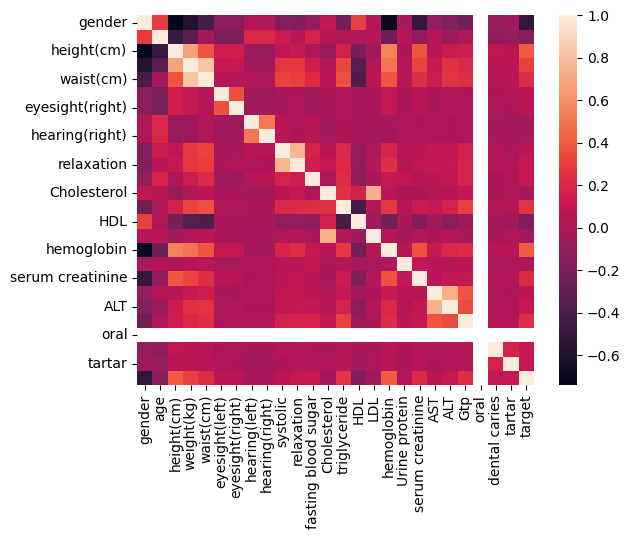

In [42]:
#### добавляем таргетный столбец к остальным
data = X.copy()
data['target'] = Y.copy()
X_temp = scaler.fit_transform(data)
data = pd.DataFrame(X_temp, columns=data.columns)

#### строим heatmap
data_correlation = data.corr()
sns.heatmap(data_correlation)

In [66]:
corr_cloumns = set()
for row_column in data_correlation:
    if cell_corr > 0.4 and cell_corr != 1.0:
        comment = row_column + " AND " + data['target'] + " has correlation = " + str(cell_corr)
        result = (row_column, data['target'], cell_corr, comment)
        if row_column != data['target']:
            corr_cloumns.add(result)

for (_, _, _, comment) in corr_cloumns:
    print(comment)

С таргетным признаком корреляции > 0.4 нет

Работа с выбросами

Найдем квартили для каждого столбца в X

In [57]:
result_percentile = dict()
for column in X.columns:
    row_result = np.percentile(X[column], [25, 50, 75])
    result_percentile[column] = row_result

# print(result_percentile)

Удалим выбросы - значения, превышающие Q75, которых при этом меньше 10 (надо выбрать, иначе уже не выбросы)

In [63]:
# for column in X.columns:
#     temp = []
#     for row in X[column]:
#         if row > (result_percentile[column])[2]:
#             temp.append[row]
#     if len(temp) < 10:
#         print(column)
#         print(temp)

gender
[]


TypeError: 'builtin_function_or_method' object is not subscriptable

#### Creating new hypotheses

#### Hypertuning 

In [ ]:
#### Некоторые переменные для гипертюнинга, по идее можно что-то добавить, но это будет пиздец)))))))) Хотя почему бы и нет...
splits = [0.2, 0.3, 0.4]
coeffs_svc = [1, 5, 10, 15]
knn_n = [5, 10, 15, 20, 25]
weigths_knn = ['uniform', 'distance']
algo_knn = ['ball_tree', 'kd_tree', 'brute', 'auto']
p_knn = [1, 2]
metric_knn = ['minkowski', 'euclidean']
tree_criteria = ['gini', 'entropy']
split_tree = ['best', 'random']
tree_max_depth = [10, 20, 30, 40, None]
estimator_bagging = [5, 10, 15, 20]



In [ ]:
#### Тут надо подумать о том какие фичи будут участвовать в обучении моделей................
# del dataset['ID']
# X = dataset
# Y = dataset['smoking']
# del X['smoking']

In [ ]:
bagging_results = []
for i in splits:
    for j in estimator_bagging:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
        tune_model = BaggingClassifier(n_estimators=j)
        tune_model.fit(X_train, y_train)
        bagging_results.append([i, j, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])

In [ ]:
tree_results = []
for i in splits:
    for j in tree_criteria:
        for k in split_tree:
            for z in tree_max_depth:
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
                tune_model = DecisionTreeClassifier(criterion=j, splitter=k, max_depth=z)
                tune_model.fit(X_train, y_train)
                tree_results.append([i, j, k, z, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])

In [ ]:
knn_results = []
for i in splits:
    for j in knn_n:
        for k in weigths_knn:
            for p in algo_knn:
                for z in p_knn:
                    for m in metric_knn:
                        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
                        tune_model = KNeighborsClassifier(n_neighbors=j, weights=k, algorithm=p, p=z, metric=m)
                        tune_model.fit(X_train, y_train)
                        knn_results.append([i, j, k, p, z, m, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])
        

In [ ]:
svc_results = []
for i in splits:
    for j in coeffs_svc:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
        tune_model = SVC(C= j)
        tune_model.fit(X_train, y_train)
        svc_results.append([i, j, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])
        

In [ ]:
knn_results[-1]

In [ ]:
sorted(svc_results, key=lambda x: x[2], reverse=True)[0]

In [ ]:
sorted(tree_results, key=lambda x: x[4], reverse=True)[0]

In [ ]:
sorted(bagging_results, key=lambda x: x[2], reverse=True)[0]

#### Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svc_model = SVC(C=10)
knn_model = KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='kd_tree', p=1, metric='minkowski')
tree_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None)
bagging_model = BaggingClassifier(n_estimators=15)
boost_model = AdaBoostClassifier()

#### Verifying hypothesis

In [ ]:
X = dataset[['eyesight(left)', 'eyesight(right)', 'dental caries', 'tartar']]
y = dataset['smoking']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Здесь дальше идёт код лучшей модели, на данный момент лучшая Bagging(Adaboost не трогал, так как хз ч там трогать)
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None),n_estimators=15)
bagging_model.fit(X_train, y_train)
predicted_X = bagging_model.predict(X_test)
score = f1_score(y_true=y_test, y_pred=predicted_X)
print('F1 measure:',score)

#### Evaluting results

In [ ]:
##### Здесь сравнение моделей


#### Collecting Results & Submission

In [ ]:
##### Сборка результирующих csv-шников с результатами проверки гипотез из лучшей модели


result_df_example.to_csv('hypothesis_name.csv')